In [1]:
import pandas
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
import geopandas

In [2]:
import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("census/demographic_profile/2018/acs_2018_X02_RACE_tract.parquet", "./acs_2018_X02_RACE_tract.parquet")

100%|██████████| 7.28M/7.28M [00:03<00:00, 2.13MB/s]


In [3]:
race_tracts = pandas.read_parquet("./acs_2018_X02_RACE_tract.parquet")

In [4]:
#B01003_001E

In [5]:
#totalpop.head()

In [6]:
race_tracts.head()

,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,...,C02003_010E,C02003_011E,C02003_012E,C02003_013E,C02003_014E,C02003_015E,C02003_016E,C02003_017E,C02003_018E,C02003_019E
GEOID,,,,,,,,,,,,,,,,,,,,,
14000US02090001700,1202.0,1115.0,0.0,39.0,7.0,31.0,0.0,10.0,0.0,10.0,...,0.0,10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
14000US02090001800,3162.0,2576.0,166.0,43.0,124.0,0.0,68.0,185.0,6.0,179.0,...,6.0,179.0,182.0,106.0,6.0,40.0,4.0,26.0,3.0,0.0
14000US02090001900,10918.0,9580.0,22.0,323.0,138.0,0.0,212.0,643.0,0.0,643.0,...,0.0,643.0,386.0,62.0,213.0,111.0,0.0,0.0,159.0,98.0
14000US02100000100,2518.0,2040.0,1.0,217.0,74.0,4.0,11.0,171.0,0.0,171.0,...,0.0,171.0,171.0,24.0,102.0,41.0,4.0,0.0,0.0,0.0
14000US02105000200,47.0,6.0,0.0,35.0,0.0,0.0,0.0,6.0,0.0,6.0,...,0.0,6.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [7]:
race_tracts.columns

Index(['B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E',
       'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E',
       'B02001_009E', 'B02001_010E',
       ...
       'C02003_010E', 'C02003_011E', 'C02003_012E', 'C02003_013E',
       'C02003_014E', 'C02003_015E', 'C02003_016E', 'C02003_017E',
       'C02003_018E', 'C02003_019E'],
      dtype='object', length=216)

In [8]:
#race_tracts.reset_index()

In [9]:
race_tracts = race_tracts[['B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E','B02001_008E']]

In [10]:
race_tracts.head()

,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_008E
GEOID,,,,,,
14000US02090001700,1115.0,0.0,39.0,7.0,31.0,10.0
14000US02090001800,2576.0,166.0,43.0,124.0,0.0,185.0
14000US02090001900,9580.0,22.0,323.0,138.0,0.0,643.0
14000US02100000100,2040.0,1.0,217.0,74.0,4.0,171.0
14000US02105000200,6.0,0.0,35.0,0.0,0.0,6.0


In [11]:
race_tracts = race_tracts.rename(columns={'B02001_002E':'white','B02001_003E':'black','B02001_004E':'amind','B02001_005E':'asian','B02001_006E':'nh_pi','B02001_008E':'two_or_more'})

In [12]:
race_tracts.head()

,white,black,amind,asian,nh_pi,two_or_more
GEOID,,,,,,
14000US02090001700,1115.0,0.0,39.0,7.0,31.0,10.0
14000US02090001800,2576.0,166.0,43.0,124.0,0.0,185.0
14000US02090001900,9580.0,22.0,323.0,138.0,0.0,643.0
14000US02100000100,2040.0,1.0,217.0,74.0,4.0,171.0
14000US02105000200,6.0,0.0,35.0,0.0,0.0,6.0


In [13]:
race_tracts.reset_index(level=0,inplace=True)

In [14]:
#race_tracts['GEOID'] = race_tracts.index

In [15]:
race_tracts.columns

Index(['GEOID', 'white', 'black', 'amind', 'asian', 'nh_pi', 'two_or_more'], dtype='object')

In [16]:
race_tracts.head()

,GEOID,white,black,amind,asian,nh_pi,two_or_more
0,14000US02090001700,1115.0,0.0,39.0,7.0,31.0,10.0
1,14000US02090001800,2576.0,166.0,43.0,124.0,0.0,185.0
2,14000US02090001900,9580.0,22.0,323.0,138.0,0.0,643.0
3,14000US02100000100,2040.0,1.0,217.0,74.0,4.0,171.0
4,14000US02105000200,6.0,0.0,35.0,0.0,0.0,6.0


In [17]:
#race_tracts["GEOID"]=race_tracts["GEOID"].astype(float)

In [18]:
race_tracts = race_tracts[race_tracts.GEOID.str.startswith('14000US06')]

In [19]:
race_tracts.head()

,GEOID,white,black,amind,asian,nh_pi,two_or_more
3560,14000US06001443322,708.0,63.0,26.0,2241.0,49.0,179.0
3561,14000US06001444100,4125.0,21.0,24.0,2164.0,18.0,231.0
3562,14000US06001444200,2221.0,344.0,41.0,2269.0,73.0,441.0
3563,14000US06001444301,1652.0,231.0,67.0,890.0,66.0,325.0
3564,14000US06001444302,936.0,226.0,68.0,1246.0,50.0,203.0


In [20]:
race_tracts.columns

Index(['GEOID', 'white', 'black', 'amind', 'asian', 'nh_pi', 'two_or_more'], dtype='object')

In [21]:
race_tracts['GEOID'] = [v[7:] for v in race_tracts.GEOID.values]

In [22]:
race_tracts.head()

,GEOID,white,black,amind,asian,nh_pi,two_or_more
3560,06001443322,708.0,63.0,26.0,2241.0,49.0,179.0
3561,06001444100,4125.0,21.0,24.0,2164.0,18.0,231.0
3562,06001444200,2221.0,344.0,41.0,2269.0,73.0,441.0
3563,06001444301,1652.0,231.0,67.0,890.0,66.0,325.0
3564,06001444302,936.0,226.0,68.0,1246.0,50.0,203.0


In [23]:
race_tracts['GEOID'] = [v[:5] for v in race_tracts.GEOID.values]

In [24]:
race_tracts.head()

,GEOID,white,black,amind,asian,nh_pi,two_or_more
3560,06001,708.0,63.0,26.0,2241.0,49.0,179.0
3561,06001,4125.0,21.0,24.0,2164.0,18.0,231.0
3562,06001,2221.0,344.0,41.0,2269.0,73.0,441.0
3563,06001,1652.0,231.0,67.0,890.0,66.0,325.0
3564,06001,936.0,226.0,68.0,1246.0,50.0,203.0


In [25]:
race_tracts.groupby(by='GEOID').sum()

,white,black,amind,asian,nh_pi,two_or_more
GEOID,,,,,,
06001,681725.0,177135.0,10712.0,486434.0,13768.0,104155.0
06003,723.0,9.0,311.0,8.0,8.0,87.0
06005,32989.0,790.0,305.0,499.0,73.0,1799.0
06007,186095.0,3477.0,2885.0,10151.0,427.0,14150.0
06009,41375.0,302.0,492.0,568.0,126.0,1825.0
06011,18854.0,362.0,201.0,324.0,53.0,558.0
06013,648325.0,97333.0,5529.0,185065.0,5585.0,78434.0
06015,20958.0,785.0,2024.0,977.0,17.0,1695.0
06017,164202.0,1494.0,1268.0,8291.0,406.0,6949.0


In [26]:
dem_income = gpd.read_parquet('./gv/dem_income.parquet')

In [27]:
dem_income.head()

,GEOID,NAMELSAD,CountyName,geometry,total_mf_10_19,median_household_income
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",294.0,48125.0
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",196932.0,21635098.0
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",64685.0,6803252.0
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",4245.0,554899.0
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",116814.0,15141748.0


In [28]:
dem_race_count = dem_income.merge(race_tracts.groupby(by='GEOID').sum(),on='GEOID')

In [29]:
dem_race_count.head()

,GEOID,NAMELSAD,CountyName,geometry,total_mf_10_19,median_household_income,white,black,amind,asian,nh_pi,two_or_more
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",294.0,48125.0,2890.0,6.0,25.0,0.0,0.0,9.0
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",196932.0,21635098.0,875793.0,149064.0,10340.0,235474.0,16715.0,107565.0
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",64685.0,6803252.0,344026.0,8626.0,4389.0,23863.0,814.0,19996.0
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",4245.0,554899.0,41375.0,302.0,492.0,568.0,126.0,1825.0
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",116814.0,15141748.0,680197.0,14835.0,7069.0,61772.0,1771.0,37561.0


In [30]:
#dem_race_count.to_parquet('dem_race_count.parquet')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [73]:
dem_race_count.shape

(58, 12)

<AxesSubplot:>

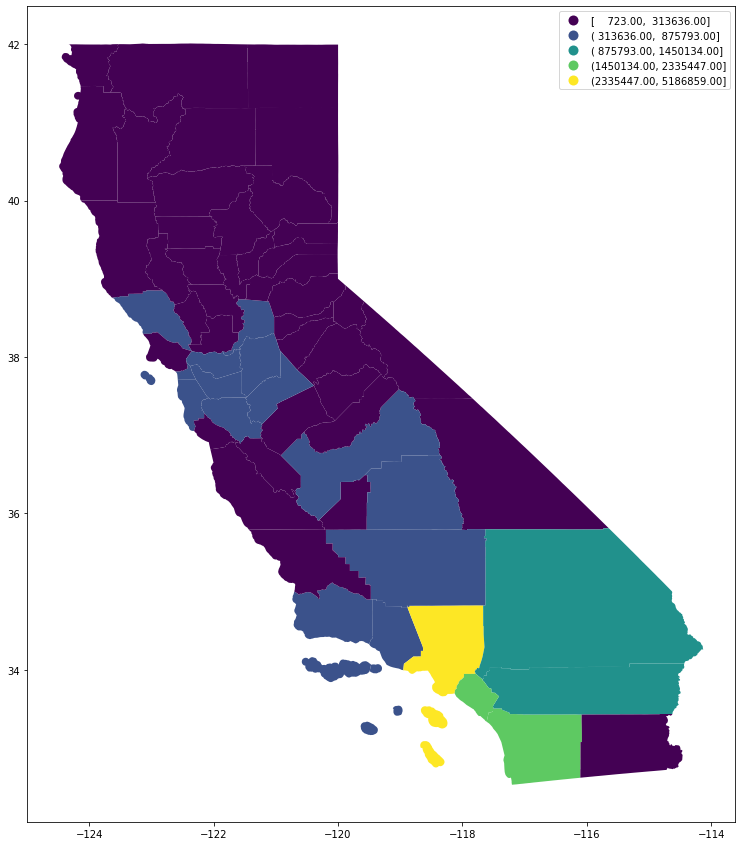

In [74]:
dem_race_count.plot(column='white', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [ ]:
'white','black','amind','asian','nh_pi','two_or_more'

<AxesSubplot:>

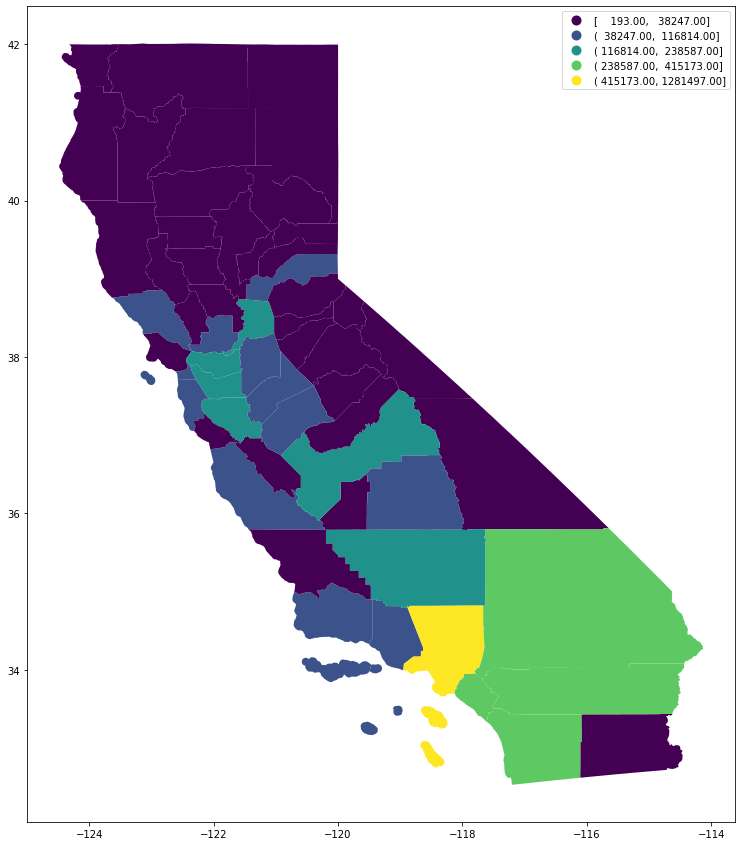

In [23]:
dem_income.plot(column='total_mf_10_19', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [157]:
#dem_tracts = gpd.read_parquet('demographics_tracts.parquet')

In [158]:
#dem_tracts.head()

,GEOID1,total_mf_10_19,geometry
0,06037137504,229.0,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06037138000,404.0,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06037139200,625.0,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06067002300,259.0,"POLYGON ((-121.50218 38.55643, -121.50184 38.5..."
4,06067002400,452.0,"POLYGON ((-121.50970 38.54070, -121.50960 38.5..."


In [5]:
import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("census/demographic_profile/2018/acs_2018_X03_HISPANIC_OR_LATINO_ORIGIN_tract.parquet", "./acs_2018_X03_HISPANIC_OR_LATINO_ORIGIN_tract.parquet")

100%|██████████| 4.56M/4.56M [00:03<00:00, 1.27MB/s]


In [108]:
latino = pandas.read_parquet('./acs_2018_X03_HISPANIC_OR_LATINO_ORIGIN_tract.parquet')

In [109]:
latino.head()

,B03001_001E,B03001_002E,B03001_003E,B03001_004E,B03001_005E,B03001_006E,B03001_007E,B03001_008E,B03001_009E,B03001_010E,...,B03002_015E,B03002_016E,B03002_017E,B03002_018E,B03002_019E,B03002_020E,B03002_021E,B03003_001E,B03003_002E,B03003_003E
GEOID,,,,,,,,,,,,,,,,,,,,,
14000US02020001300,3127.0,2903.0,224.0,83.0,0.0,9.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3127.0,2903.0,224.0
14000US02020001400,5047.0,4679.0,368.0,182.0,123.0,0.0,0.0,37.0,0.0,0.0,...,16.0,0.0,0.0,2.0,74.0,48.0,26.0,5047.0,4679.0,368.0
14000US02020001500,5388.0,5063.0,325.0,206.0,0.0,0.0,0.0,44.0,0.0,44.0,...,62.0,0.0,0.0,171.0,0.0,0.0,0.0,5388.0,5063.0,325.0
14000US02020001601,4058.0,3582.0,476.0,254.0,22.0,0.0,166.0,0.0,0.0,0.0,...,0.0,25.0,0.0,317.0,9.0,9.0,0.0,4058.0,3582.0,476.0
14000US02020001602,4450.0,4250.0,200.0,173.0,2.0,0.0,0.0,7.0,0.0,7.0,...,6.0,0.0,0.0,24.0,47.0,19.0,28.0,4450.0,4250.0,200.0


In [110]:
latino = latino[['B03003_003E']]

In [111]:
latino.head()

,B03003_003E
GEOID,
14000US02020001300,224.0
14000US02020001400,368.0
14000US02020001500,325.0
14000US02020001601,476.0
14000US02020001602,200.0


In [112]:
latino = latino.rename(columns={'B03003_003E':"Latino"})

In [113]:
latino.head()

,Latino
GEOID,
14000US02020001300,224.0
14000US02020001400,368.0
14000US02020001500,325.0
14000US02020001601,476.0
14000US02020001602,200.0


In [114]:
#latino.reset_index()

In [115]:
latino.reset_index(level=0,inplace=True)

In [116]:
latino.head()

,GEOID,Latino
0,14000US02020001300,224.0
1,14000US02020001400,368.0
2,14000US02020001500,325.0
3,14000US02020001601,476.0
4,14000US02020001602,200.0


In [117]:
latino = latino[latino.GEOID.str.startswith('14000US06')]

In [118]:
latino.head()

,GEOID,Latino
3560,14000US06037554001,1936.0
3561,14000US06037554002,3379.0
3562,14000US06037554101,2683.0
3563,14000US06037554103,893.0
3564,14000US06037554104,1415.0


In [119]:
latino['GEOID'] = [v[7:] for v in latino.GEOID.values]

In [120]:
latino.head()

,GEOID,Latino
3560,06037554001,1936.0
3561,06037554002,3379.0
3562,06037554101,2683.0
3563,06037554103,893.0
3564,06037554104,1415.0


In [121]:
latino

,GEOID,Latino
3560,06037554001,1936.0
3561,06037554002,3379.0
3562,06037554101,2683.0
3563,06037554103,893.0
3564,06037554104,1415.0
...,...,...
11612,06115040800,738.0
11613,06115040901,501.0
11614,06115040902,356.0
11615,06115041000,699.0


In [122]:
latino["county"]=[code[2:5] for code in latino.GEOID.values]

In [124]:
latino.head()

,GEOID,Latino,county
3560,06037554001,1936.0,037
3561,06037554002,3379.0,037
3562,06037554101,2683.0,037
3563,06037554103,893.0,037
3564,06037554104,1415.0,037


In [129]:
latino_county=latino.groupby(by='county').sum()

In [130]:
latino_county

,Latino
county,
001,369061.0
003,105.0
005,5132.0
007,36358.0
009,5297.0
011,12655.0
013,288101.0
015,5340.0
017,23631.0


In [131]:
latino_county.shape

(58, 1)

In [132]:
latino_county.to_parquet('latino.parquet')

In [47]:
incomefinal = geopandas.read_parquet("incomefinal.parquet")

FileNotFoundError: incomefinal.parquet

In [2]:
racetracts=latino.merge(race_tracts,left_on="GEOID",right_on="GEOID")

NameError: name 'latino' is not defined

In [3]:
racetracts.head()

NameError: name 'racetracts' is not defined

In [41]:
latino.dtypes

Latino    float64
dtype: object

In [42]:
race_tracts.dtypes

white          float64
black          float64
amind          float64
asian          float64
nh_pi          float64
two_or_more    float64
dtype: object